In [12]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [6]:
# Create directories to store the datasets
train_dir = "training_data"
test_dir = "test_data"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
np.save(os.path.join(train_dir, "train_images.npy"), train_images)
np.save(os.path.join(train_dir, "train_labels.npy"), train_labels)
np.save(os.path.join(test_dir, "test_images.npy"), test_images)
np.save(os.path.join(test_dir, "test_labels.npy"), test_labels)

In [7]:
# Load the training dataset
train_images = np.load("training_data/train_images.npy")
train_labels = np.load("training_data/train_labels.npy")
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

Training images shape: (60000, 784)
Training labels shape: (60000, 10)


In [9]:
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(784,)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Accuracy:", test_accuracy)


Epoch 1/5
1875/1875 [==============================] - 46s 23ms/step - loss: 0.1411 - accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0452 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0324 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0236 - accuracy: 0.9923
Epoch 5/5
313/313 [==============================] - 5s 13ms/step - loss: 0.0431 - accuracy: 0.9876
Test Accuracy: 0.9876000285148621


1/1 [==============================] - 0s 39ms/step


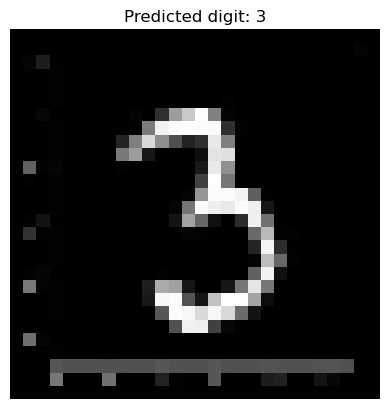

In [22]:
new_image = cv2.imread("C:\\Users\\Hp\\OneDrive\\Desktop\\test 4.jpeg", cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (28, 28))
new_image = 255 - new_image
new_image = new_image / 255.0
new_image = new_image.reshape(1, 784)
predicted_probs = model.predict(new_image)
predicted_digit = np.argmax(predicted_probs[0])
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted digit: {predicted_digit}')
plt.axis('off')
plt.sh
